# Análise exploratória dos dados do SISU (2019 - 2022)

In [1]:
import psycopg2 as pspg
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter 
from scipy import stats
import dask.dataframe as dd
import sqlalchemy as sql
CONN = pspg.connect(database='notas', user='dev', password='dev', host='localhost', port='5030')

In [2]:
df = pd.read_sql('''
  select 
    id,
    sd.peso_l,
    sd.peso_ch,
    sd.peso_cn,
    sd.peso_m,
    sd.peso_r,
    sd.nota_minima_l,
    sd.nota_minima_ch,
    sd.nota_minima_cn,
    sd.nota_minima_m,
    sd.nota_minima_r,
    sd.media_minima,
    sd.nota_l,
    sd.nota_ch,
    sd.nota_cn,
    sd.nota_m,
    sd.nota_r,
    sd.nota_l_com_peso,
    sd.nota_ch_com_peso,
    sd.nota_cn_com_peso,
    sd.nota_m_com_peso,
    sd.nota_r_com_peso,
    sd.nota_candidato,
    sd.nota_corte
  from sisu_nota sd
  tablesample bernoulli(10)
  ''', con=CONN)

/tmp/ipykernel_8254/2414260062.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql('''


In [3]:
df.dtypes

id                    int64
peso_l              float64
peso_ch             float64
peso_cn             float64
peso_m              float64
peso_r              float64
nota_minima_l       float64
nota_minima_ch      float64
nota_minima_cn      float64
nota_minima_m       float64
nota_minima_r       float64
media_minima        float64
nota_l              float64
nota_ch             float64
nota_cn             float64
nota_m              float64
nota_r              float64
nota_l_com_peso     float64
nota_ch_com_peso    float64
nota_cn_com_peso    float64
nota_m_com_peso     float64
nota_r_com_peso     float64
nota_candidato      float64
nota_corte          float64
dtype: object

In [4]:
df.head()

,id,peso_l,peso_ch,peso_cn,peso_m,peso_r,nota_minima_l,nota_minima_ch,nota_minima_cn,nota_minima_m,...,nota_cn,nota_m,nota_r,nota_l_com_peso,nota_ch_com_peso,nota_cn_com_peso,nota_m_com_peso,nota_r_com_peso,nota_candidato,nota_corte
0,5,1.0,1.0,2.0,4.0,3.0,453.8,444.7,453.3,438.4,...,595.4,671.7,640.0,637.8,741.4,1190.8,2686.8,1920.0,652.44,718.99
1,8,1.0,1.0,2.0,4.0,3.0,453.8,444.7,453.3,438.4,...,594.5,688.7,800.0,612.7,600.5,1189.0,2754.8,2400.0,687.00,718.99
2,35,1.0,1.0,2.0,4.0,3.0,453.8,444.7,453.3,438.4,...,625.1,830.1,800.0,556.6,539.9,1250.2,3320.4,2400.0,733.37,718.99
3,43,1.0,1.0,2.0,4.0,3.0,453.8,444.7,453.3,438.4,...,509.6,446.0,520.0,475.1,451.3,1019.2,1784.0,1560.0,480.87,718.99
4,61,1.0,1.0,2.0,4.0,3.0,453.8,444.7,453.3,438.4,...,509.0,642.8,640.0,527.1,572.4,1018.0,2571.2,1920.0,600.79,718.99


In [5]:
df.tail()

,id,peso_l,peso_ch,peso_cn,peso_m,peso_r,nota_minima_l,nota_minima_ch,nota_minima_cn,nota_minima_m,...,nota_cn,nota_m,nota_r,nota_l_com_peso,nota_ch_com_peso,nota_cn_com_peso,nota_m_com_peso,nota_r_com_peso,nota_candidato,nota_corte
1545434,15458248,1.0,1.0,1.0,1.0,2.0,100.0,100.0,100.0,100.0,...,609.2,502.4,800.0,623.5,664.2,609.2,502.4,1600.0,666.55,667.13
1545435,15458254,1.0,1.0,1.0,1.0,2.0,100.0,100.0,100.0,100.0,...,504.6,521.2,460.0,548.8,541.6,504.6,521.2,920.0,506.03,631.20
1545436,15458275,1.0,1.0,1.0,1.0,2.0,100.0,100.0,100.0,100.0,...,461.7,411.7,560.0,530.4,480.8,461.7,411.7,1120.0,500.77,618.27
1545437,15458286,1.0,1.0,1.0,1.0,2.0,100.0,100.0,100.0,100.0,...,509.1,702.5,800.0,557.5,588.1,509.1,702.5,1600.0,659.53,667.13
1545438,15458295,1.0,1.0,1.0,1.0,2.0,100.0,100.0,100.0,100.0,...,602.8,573.9,660.0,604.1,657.4,602.8,573.9,1320.0,626.37,667.13


In [6]:
df.sample(n=5)

,id,peso_l,peso_ch,peso_cn,peso_m,peso_r,nota_minima_l,nota_minima_ch,nota_minima_cn,nota_minima_m,...,nota_cn,nota_m,nota_r,nota_l_com_peso,nota_ch_com_peso,nota_cn_com_peso,nota_m_com_peso,nota_r_com_peso,nota_candidato,nota_corte
1505790,15080195,2.0,2.0,1.0,1.0,3.0,0.01,0.01,0.01,0.01,...,531.9,522.2,780.0,1200.2,1285.6,531.9,522.2,2340.0,653.32,683.26
1156512,11579030,1.0,1.0,1.0,1.0,1.0,400.00,450.00,400.00,450.00,...,559.5,468.8,680.0,585.3,648.1,559.5,468.8,680.0,588.34,625.40
1452263,14542399,3.0,1.0,1.0,1.0,3.0,400.00,100.00,100.00,100.00,...,419.2,466.6,640.0,1520.1,602.0,419.2,466.6,1920.0,547.54,576.09
711717,7119217,1.0,1.0,1.0,1.0,1.0,0.00,0.00,0.00,0.00,...,434.2,388.9,580.0,511.1,500.4,434.2,388.9,580.0,482.92,608.26
302375,3030276,1.0,1.0,1.0,1.0,1.0,0.00,0.00,0.00,0.00,...,587.8,684.7,580.0,609.1,675.1,587.8,684.7,580.0,627.34,691.06


In [6]:
df.shape

(1545439, 24)

In [7]:
df.describe().round(3)

,id,peso_l,peso_ch,peso_cn,peso_m,peso_r,nota_minima_l,nota_minima_ch,nota_minima_cn,nota_minima_m,...,nota_cn,nota_m,nota_r,nota_l_com_peso,nota_ch_com_peso,nota_cn_com_peso,nota_m_com_peso,nota_r_com_peso,nota_candidato,nota_corte
count,1.545439e+06,1545439.000,1545439.000,1545439.000,1545439.000,1545439.000,1545439.000,1545439.000,1545439.000,1545439.000,...,1545439.000,1545439.000,1545439.000,1545439.000,1545439.000,1545439.000,1545439.000,1545439.000,1545439.000,1543268.000
mean,7.727143e+06,1.849,1.610,1.739,1.675,1.917,97.268,95.225,93.847,95.025,...,507.719,554.598,643.070,996.231,894.067,892.002,938.610,1240.505,566.849,666.871
std,4.461502e+06,1.128,0.968,1.069,1.020,1.050,164.509,162.466,161.393,163.117,...,85.117,118.315,166.913,618.399,552.046,593.435,639.517,781.731,88.263,72.190
min,5.000000e+00,1.000,1.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,...,0.000,0.000,40.000,0.000,0.000,0.000,0.000,40.000,48.000,225.590
25%,3.863568e+06,1.000,1.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,...,446.000,462.200,540.000,542.500,541.100,479.900,507.800,640.000,502.140,614.840
50%,7.728831e+06,1.000,1.000,1.000,1.000,2.000,0.010,0.010,0.010,0.010,...,503.700,542.600,620.000,670.000,635.000,585.800,666.200,960.000,559.080,664.780
75%,1.158967e+07,2.000,2.000,2.000,2.000,3.000,150.000,150.000,120.000,120.000,...,565.500,639.300,760.000,1226.200,1149.000,1163.700,1177.200,1680.000,627.020,716.260
max,1.545830e+07,5.000,5.000,5.000,5.000,5.000,650.000,650.000,650.000,750.000,...,869.600,996.100,1000.000,3943.500,3976.500,4144.000,4921.000,5000.000,990.170,952.510


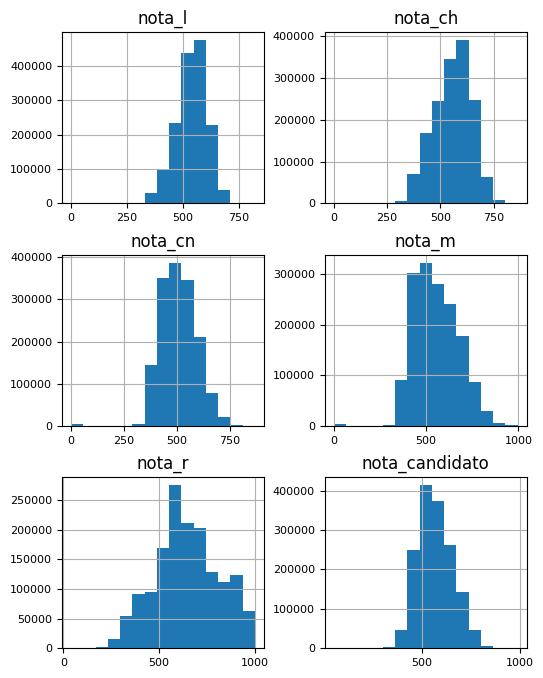

In [8]:
notas_sem_pesos = df[['nota_l', 'nota_ch', 'nota_cn', 'nota_m', 'nota_r', 'nota_candidato']]
notas_sem_pesos.hist(figsize=(6, 8), bins=15, xlabelsize=8, ylabelsize=8);

<Axes: >

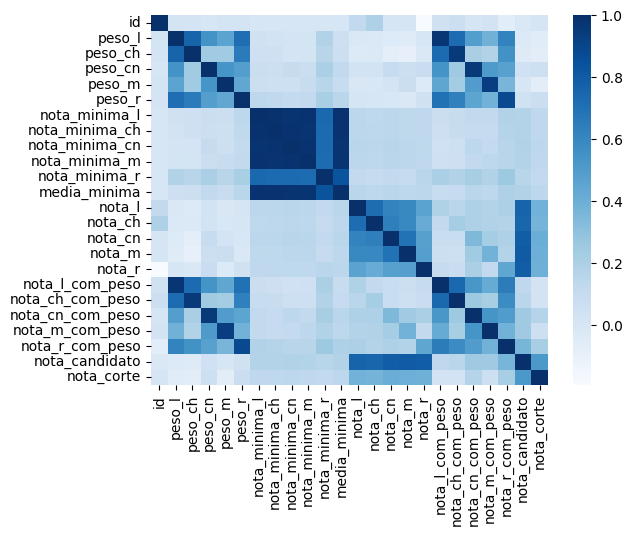

In [9]:
sns.heatmap(data=df.corr(), cmap='Blues')

In [10]:
df.corr()['nota_candidato'].sort_values(ascending=False)

nota_candidato      1.000000
nota_m              0.799859
nota_r              0.787721
nota_cn             0.785985
nota_l              0.760340
nota_ch             0.751287
nota_corte          0.517530
nota_r_com_peso     0.368874
nota_cn_com_peso    0.253311
nota_m_com_peso     0.252982
media_minima        0.183830
nota_minima_cn      0.181362
nota_minima_m       0.178307
nota_minima_l       0.177926
nota_minima_ch      0.175795
nota_minima_r       0.160262
nota_ch_com_peso    0.147580
nota_l_com_peso     0.129633
peso_cn             0.051208
peso_r              0.044636
peso_m              0.002809
id                 -0.016197
peso_l             -0.026322
peso_ch            -0.042726
Name: nota_candidato, dtype: float64

## Pela dimensão Tempo

In [13]:
df = pd.read_sql('''
  select 
    sd.id,
    sd.peso_l,
    sd.peso_ch,
    sd.peso_cn,
    sd.peso_m,
    sd.peso_r,
    sd.nota_minima_l,
    sd.nota_minima_ch,
    sd.nota_minima_cn,
    sd.nota_minima_m,
    sd.nota_minima_r,
    sd.media_minima,
    sd.nota_l,
    sd.nota_ch,
    sd.nota_cn,
    sd.nota_m,
    sd.nota_r,
    sd.nota_l_com_peso,
    sd.nota_ch_com_peso,
    sd.nota_cn_com_peso,
    sd.nota_m_com_peso,
    sd.nota_r_com_peso,
    sd.nota_candidato,
    sd.nota_corte,
    st.*
  from sisu_nota sd
  tablesample bernoulli(10)
  inner join sisu_tempo st on sd.dimensao_tempo = st.id
  ''', con=CONN)

/tmp/ipykernel_8254/1824909948.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql('''


<Axes: xlabel='ano', ylabel='pontuacao'>

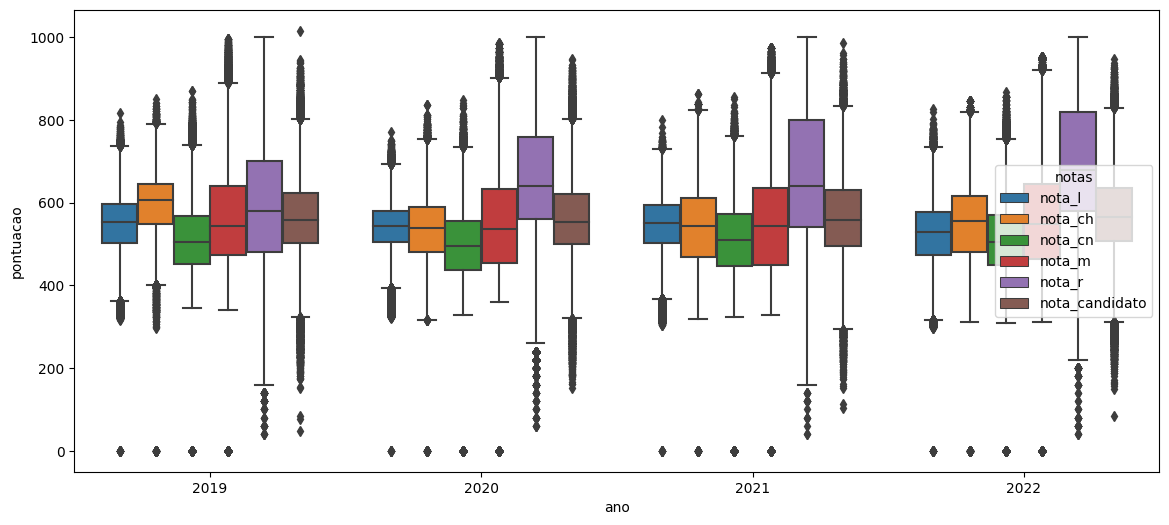

In [14]:
df_ano = df[['nota_l',
    'nota_ch',
    'nota_cn',
    'nota_m',
    'nota_r',
    'nota_candidato',
    'ano'
]]

df_ano = df_ano.melt(id_vars='ano', value_vars=['nota_l',
    'nota_ch',
    'nota_cn',
    'nota_m',
    'nota_r',
    'nota_candidato'
], var_name='notas', value_name='pontuacao')
plt.figure(figsize=(14, 6))
sns.boxplot(x='ano', y='pontuacao', hue='notas', data=df_ano, dodge=True)

In [15]:
df.dtypes

id                    int64
peso_l              float64
peso_ch             float64
peso_cn             float64
peso_m              float64
peso_r              float64
nota_minima_l       float64
nota_minima_ch      float64
nota_minima_cn      float64
nota_minima_m       float64
nota_minima_r       float64
media_minima        float64
nota_l              float64
nota_ch             float64
nota_cn             float64
nota_m              float64
nota_r              float64
nota_l_com_peso     float64
nota_ch_com_peso    float64
nota_cn_com_peso    float64
nota_m_com_peso     float64
nota_r_com_peso     float64
nota_candidato      float64
nota_corte          float64
id                    int64
ano                   int64
edicao                int64
codigo_etapa          int64
etapa                object
dtype: object

In [37]:
__df = df.groupby(by='edicao')
__df.count()['nota_candidato']

edicao
1    1343870
2     203283
Name: nota_candidato, dtype: int64

## Pela dimensão Candidato

In [40]:
df = pd.read_sql('''
  select 
    sd.peso_l,
    sd.peso_ch,
    sd.peso_cn,
    sd.peso_m,
    sd.peso_r,
    sd.nota_minima_l,
    sd.nota_minima_ch,
    sd.nota_minima_cn,
    sd.nota_minima_m,
    sd.nota_minima_r,
    sd.media_minima,
    sd.nota_l,
    sd.nota_ch,
    sd.nota_cn,
    sd.nota_m,
    sd.nota_r,
    sd.nota_l_com_peso,
    sd.nota_ch_com_peso,
    sd.nota_cn_com_peso,
    sd.nota_m_com_peso,
    sd.nota_r_com_peso,
    sd.nota_candidato,
    sd.nota_corte,
    sc.*
  from sisu_nota sd
  tablesample bernoulli(10)
  inner join sisu_candidato sc on sd.dimensao_candidato = sc.id
  ''', con=CONN)

/tmp/ipykernel_8254/810550097.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql('''


In [41]:
df.dtypes

peso_l                 float64
peso_ch                float64
peso_cn                float64
peso_m                 float64
peso_r                 float64
nota_minima_l          float64
nota_minima_ch         float64
nota_minima_cn         float64
nota_minima_m          float64
nota_minima_r          float64
media_minima           float64
nota_l                 float64
nota_ch                float64
nota_cn                float64
nota_m                 float64
nota_r                 float64
nota_l_com_peso        float64
nota_ch_com_peso       float64
nota_cn_com_peso       float64
nota_m_com_peso        float64
nota_r_com_peso        float64
nota_candidato         float64
nota_corte             float64
id                       int64
inscrito                object
sexo                    object
uf_candidato            object
municipio_candidato     object
matricula               object
data_nascimento         object
aprovado                  bool
opcao                    int64
dtype: o

In [48]:
groups = df.groupby(by='sexo')
# means = groups['nota_candidato'].mean()
# medians = groups['nota_candidato'].median()
# stds = groups['nota_candidato'].std()
# vars = groups['nota_candidato'].var()
groups['nota_candidato'].describe().round(3)

,count,mean,std,min,25%,50%,75%,max
sexo,,,,,,,,
F,932848.0,561.507,87.802,76.00,496.84,551.98,621.27,963.07
M,613276.0,574.699,88.236,37.78,510.58,569.22,634.73,973.99


In [ ]:
#TODO: test t student

In [69]:
groups = df.groupby(by='uf_candidato')
describer = groups['nota_candidato'].describe().round(3).reset_index()
describer

,uf_candidato,count,mean,std,min,25%,50%,75%,max
0,AC,11815.0,546.433,90.858,166.20,476.115,534.330,608.875,901.56
1,AL,35371.0,535.028,83.423,84.00,474.595,522.840,584.720,894.89
2,AM,23014.0,533.948,78.573,180.14,478.282,526.200,581.688,830.79
3,AP,9351.0,541.963,90.587,215.54,476.125,523.350,597.305,953.14
4,BA,123063.0,551.326,81.453,131.10,491.560,543.320,605.680,887.10
5,CE,97744.0,567.866,89.067,160.24,502.568,558.980,627.080,955.15
6,DF,29554.0,577.095,88.451,169.83,512.350,570.870,638.170,917.28
7,ES,32898.0,577.947,87.758,155.38,515.092,572.290,637.535,871.07
8,GO,46696.0,571.598,89.603,222.23,504.808,563.600,635.040,914.47
9,MA,69969.0,545.630,93.392,104.00,478.240,529.620,597.040,973.99


<Axes: xlabel='uf_candidato', ylabel='count'>

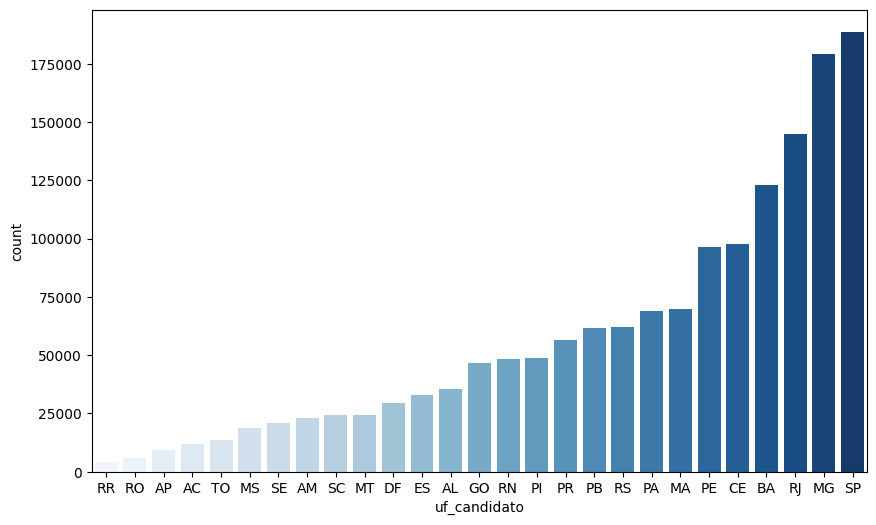

In [72]:
plt.figure(figsize=(10,6))
sns.set_palette('Blues')
sns.barplot(x='uf_candidato', y='count', data=describer.sort_values(by='count'), palette='Blues')

In [77]:
describer.sort_values(by='mean', ascending=False)[['uf_candidato', 'mean']].reset_index()

,index,uf_candidato,mean
0,25,SP,599.537
1,23,SC,589.019
2,10,MG,581.401
3,18,RJ,578.438
4,7,ES,577.947
5,6,DF,577.095
6,17,PR,574.324
7,24,SE,573.591
8,22,RS,571.834
9,8,GO,571.598


In [89]:
p_values = []
stats_values = []
ufs = df['uf_candidato'].unique()
for uf in ufs:
    uf_data = df[df['uf_candidato'] == uf]['nota_candidato']
    stat, p = stats.shapiro(uf_data)
    p_values.append(p)
    stats_values.append(stat)
print(p_values)
print(stats_values)
shapiro_df = pd.DataFrame({
    'uf': ufs,
    'p': p_values,
    'stat': stats_values
})
shapiro_df.round(7)
# CONN.close()

/home/gustavo/.local/lib/python3.10/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


[1.0930128021733573e-43, 0.0, 1.1040342814024996e-34, 0.0, 1.5414283107572988e-44, 0.0, 1.6345586223656153e-26, 1.1046729506430655e-37, 1.2611686178923354e-44, 0.0, 3.3233460505299826e-15, 4.049752561898721e-43, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.6624670822171524e-44, 0.0, 0.0, 1.115606988848034e-35, 0.0, 0.0, 2.9006878211523713e-43, 4.5911920768642045e-21, 1.791941239821575e-39]
[0.997124195098877, 0.9938498139381409, 0.9930089116096497, 0.9942452311515808, 0.9925300478935242, 0.9893758296966553, 0.9953859448432922, 0.9868836998939514, 0.9930466413497925, 0.9796497225761414, 0.9939458966255188, 0.9751850366592407, 0.9828857779502869, 0.9887023568153381, 0.9841209650039673, 0.9880797863006592, 0.9688982367515564, 0.9812604784965515, 0.9837757349014282, 0.9727494716644287, 0.9491684436798096, 0.9931983947753906, 0.9557168483734131, 0.9684207439422607, 0.9833256602287292, 0.9834021925926208, 0.977330207824707]


,uf,p,stat
0,SP,0.0,0.997124
1,MG,0.0,0.993850
2,DF,0.0,0.993009
3,RJ,0.0,0.994245
4,PR,0.0,0.992530
5,GO,0.0,0.989376
6,SC,0.0,0.995386
7,MS,0.0,0.986884
8,RS,0.0,0.993047
9,PA,0.0,0.979650


In [92]:
print('h0: as médias dos grupos são iguais')
stat, p = stats.kruskal(*[group['nota_candidato'].values for name, group in groups])
print(f"Resultado do teste de Kruskal-Wallis: statistic={stat:.4f}, p-value={p:.4f}")
if p < 0.01:
    print('hipótese nula rejeitada')
else:
    print('hipótese nula confirmada')

h0: as médias dos grupos são iguais
Resultado do teste de Kruskal-Wallis: statistic=82714.7091, p-value=0.0000
hipótese nula rejeitada
